<a href="https://colab.research.google.com/github/akkuhanu/DeepLearning/blob/main/DeepLpractice/Data_Augmentation/tut_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [8]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='https://github.com/akkuhanu/DeepLearning/tree/main/DeepLpractice/Data_Augmentation',untar=True)


In [9]:
data_dir

'/tmp/.keras/datasets/flower_photos'

In [10]:
import pathlib 

data_dir = pathlib.Path(data_dir)
# automatically reaches the all subdirectory
data_dir

PosixPath('/tmp/.keras/datasets/flower_photos')

In [11]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/4632235020_d00ce1e497.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/8717157979_05cbc10cc1.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/2229906591_e953785d13.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/17574213074_f5416afd84.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/8780964418_7a01a7f48a_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/6146107825_45f708ecd7_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/8791577794_7573712cb4_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/8935456132_8dc4d3b679_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/14053173516_a00150a919_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/4571923094_b9cefa9438_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/dandelion/14003401241_543535b385.jpg'),
 PosixPath('/tmp/.keras/datasets/flower

In [13]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [15]:
roses = list(data_dir.glob('roses/*'))
roses_count = len(roses)
roses[:5]
roses_count

641

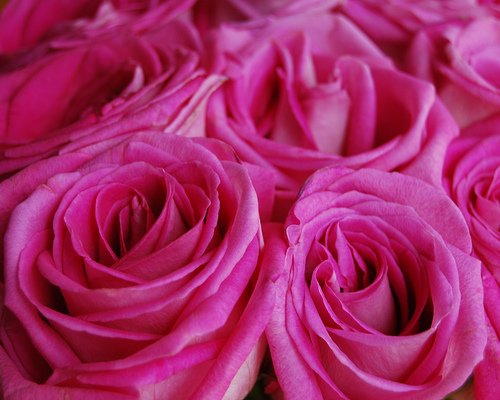

In [17]:
PIL.Image.open(str(roses[1]))

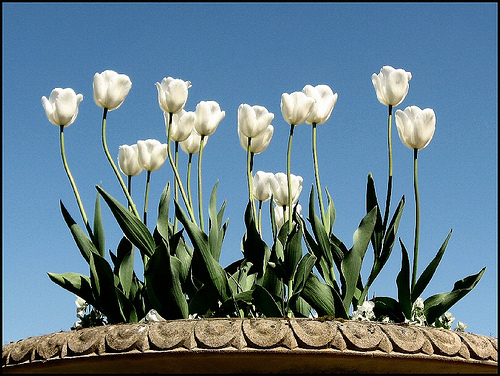

In [18]:
tulips = list(data_dir.glob('tulips/*'))
tulips_count = len(tulips)
PIL.Image.open(str(tulips[1]))

In [19]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [20]:
flowers_images_dict['daisy']

[PosixPath('/tmp/.keras/datasets/flower_photos/daisy/1150395827_6f94a5c6e4_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/2087343668_ef4fb95787_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/153210866_03cc9f2f36.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/2649404904_b7a91991bb_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/521762040_f26f2e08dd.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/5608389827_a42a46f760.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/4085794721_7cd88e0a6c_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/4753134939_8e87649db6.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/5714327423_50af0cffe9.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/8671824531_64b816949e_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/4666648087_b10f376f19.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/1392946544_115acbb2d9.jpg'),
 PosixPa

In [21]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1 ,
    'dandelion' : 2,
    'sunflowers' : 3 ,
    'tulips' : 4,
}

In [25]:
path = flowers_images_dict['roses'][0]
path

PosixPath('/tmp/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [27]:
img = cv2.imread(str(path))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [29]:
img.shape
# (x,y,rgb_channel)

# isme shayad ulta hota h kii column,row type

(240, 179, 3)

In [32]:
# since in our flowers folder , all images are of different sizes so we want to resize it.
im2 = cv2.resize(img,(180,180))
im2.shape

(180, 180, 3)

In [33]:
X , y = [] , []

for flower_name , images in flowers_images_dict.items():
  print(flower_name)
  print(images)

roses
[PosixPath('/tmp/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'), PosixPath('/tmp/.keras/datasets/flower_photos/roses/3450344423_63ba3190e3.jpg'), PosixPath('/tmp/.keras/datasets/flower_photos/roses/4065283966_9504b98269.jpg'), PosixPath('/tmp/.keras/datasets/flower_photos/roses/2273917656_6d6c038283.jpg'), PosixPath('/tmp/.keras/datasets/flower_photos/roses/5578766623_542c91dfaa_n.jpg'), PosixPath('/tmp/.keras/datasets/flower_photos/roses/5892908233_6756199a43.jpg'), PosixPath('/tmp/.keras/datasets/flower_photos/roses/14312910041_b747240d56_n.jpg'), PosixPath('/tmp/.keras/datasets/flower_photos/roses/7865295712_bcc94d120c.jpg'), PosixPath('/tmp/.keras/datasets/flower_photos/roses/16334786972_1b3e71cab8_m.jpg'), PosixPath('/tmp/.keras/datasets/flower_photos/roses/3102535578_ec8c12a7b6_m.jpg'), PosixPath('/tmp/.keras/datasets/flower_photos/roses/19988406792_68201f76e3_n.jpg'), PosixPath('/tmp/.keras/datasets/flower_photos/roses/5223191368_01aedb6547_n.jpg'), Pos

In [34]:
for flower_name , images in flowers_images_dict.items():
  # print(flower_name)
  for image in images:
    img = cv2.imread(str(image))
    # Machine learning expect all the learning / training sampels to be of same size.
    resized_img = cv2.resize(img,(180, 180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [35]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [36]:
X = np.array(X)
y = np.array(y)

In [38]:
from sklearn.model_selection import train_test_split

# (X_train,X_test),(y_train,y_test) = train_test_split(X,y,random_state=0)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [40]:
# X_train.head() --> 'numpy.ndarray' object has no attribute 'head'

In [41]:
len(X_train)

2752

In [42]:
len(X_test)

918

In [45]:
X_train_scaled = X_train / 255
# since rgb value 255 isliye we divide by this for scaling.

X_test_scaled = X_test / 255

In [ ]:
# (16,3). --> means 16 filter each having size 3*3

num_classes = 5

model = Sequential(
    [
     layers.Conv2D(16,3,padding='same',activation='relu'),
     layers.MaxPooling2D(),

     layers.Conv2D(32,3,padding='same',activation='relu'),
     layers.MaxPooling2D(),

     layers.Conv2D(64,3,padding='same',activation='relu'),
     layers.MaxPooling2D(),
     
     layers.Flatten(),

     layers.Dense(128,activation='relu'),
     layers.Dense(num_classes),

    ]
)


# layers.Dense(num_classes) ---> since bhaii hame 5 number output milenge kyoki 5 flowers h maximum vala answer hoga.

  # Syntax
# filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, 
# dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None

# only filters and kernel_size parameters must be given, others are optional or has default values next to them.


model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/30
86/86 [==============================] - 88s 1s/step - loss: 1.3827 - accuracy: 0.4208
Epoch 2/30
86/86 [==============================] - 78s 909ms/step - loss: 0.9969 - accuracy: 0.6105
Epoch 3/30
86/86 [==============================] - 78s 908ms/step - loss: 0.8564 - accuracy: 0.6748
Epoch 4/30
86/86 [==============================] - 78s 912ms/step - loss: 0.6898 - accuracy: 0.7413
Epoch 5/30
86/86 [==============================] - 78s 912ms/step - loss: 0.5023 - accuracy: 0.8190
Epoch 6/30
86/86 [==============================] - 79s 916ms/step - loss: 0.3157 - accuracy: 0.8932
Epoch 7/30
86/86 [==============================] - 79s 919ms/step - loss: 0.1692 - accuracy: 0.9484
Epoch 8/30
86/86 [==============================] - 79s 918ms/step - loss: 0.1101 - accuracy: 0.9688
Epoch 9/30
86/86 [==============================] - 80s 929ms/step - loss: 0.0613 - accuracy: 0.9855
Epoch 10/30
86/86 [==============================] - 79s 918ms/step - loss: 0.0547 - accuracy:

In [ ]:
# model.evaluate(X_test_scaled,y_test)
